#Cиний уровень

In [1]:
#импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

###Тест 20 вопросов

вероятность сильного и слабого пройти тест полностью правильно

In [2]:
n = 20
p_strong = 0.98
p_weak = 0.9
print(f'вероятность слабого пройти тест полность правильно: {sps.binom.pmf(20, n, p_weak)*100:.3}%',
      f'\nвероятность сильного пройти тест полность правильно: {sps.binom.pmf(20, n, p_strong)*100:.3}%')


вероятность слабого пройти тест полность правильно: 12.2% 
вероятность сильного пройти тест полность правильно: 66.8%


**Графики**

In [3]:
data = []
data.append({'porog': 0, 'strong_pass_prob': 1.00, 'weak_pass_prob': 1.00})
df = pd.DataFrame(data)
df_title = "Вероятность преодолеть порог k задач\nдля сильного и слабого кандидата"
df.style.hide(axis="index").set_caption(df_title)

porog,strong_pass_prob,weak_pass_prob
0,1.000000,1.000000


In [4]:
p_strong = 0.98
p_weak = 0.9
n = 20

df = pd.DataFrame(columns=['porog', 'prob_strong', 'prob_weak'])

data = []

# Вычисление вероятностей прохождения теста для каждого значения k от 0 до 30
for k in range(n + 1):
    prob_strong = 1 - sps.binom.cdf(k - 1, n, p_strong)
    prob_weak = 1 - sps.binom.cdf(k - 1, n, p_weak)

    # Добавление в список
    data.append({'porog': k, 'strong_pass_prob': prob_strong, 'weak_pass_prob': prob_weak})

# Создание DataFrame из списка
df = pd.DataFrame(data)


# Вывод таблицы
df_title = "Вероятность преодолеть порог k задач\nдля сильного и слабого кандидата"
df.style.hide(axis="index").set_caption(df_title)

porog,strong_pass_prob,weak_pass_prob
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,1.000000,1.000000
4,1.000000,1.000000
5,1.000000,1.000000
6,1.000000,1.000000
7,1.000000,1.000000
8,1.000000,1.000000
9,1.000000,1.000000


In [5]:
df.iloc[14:].style.hide(axis="index").set_caption(df_title)

porog,strong_pass_prob,weak_pass_prob
14,1.000000,0.997614
15,0.999998,0.988747
16,0.999961,0.956826
17,0.999400,0.867047
18,0.992931,0.676927
19,0.940101,0.391747
20,0.667608,0.121577


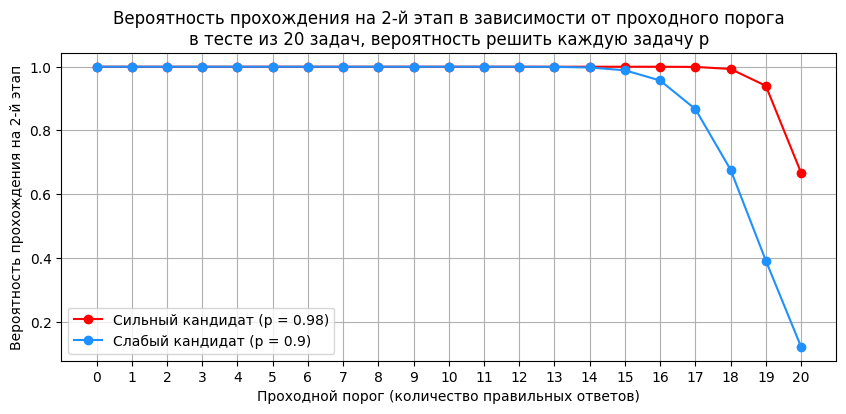

In [22]:
plt.figure(figsize=(10, 4))

plt.plot(df['porog'], df['strong_pass_prob'],   color='r', marker='o', label='Сильный кандидат (p = 0.98)')
plt.plot(df['porog'], df['weak_pass_prob'],  color='dodgerblue', marker='o', label='Слабый кандидат (p = 0.9)')



plt.title('''Вероятность прохождения на 2-й этап в зависимости от проходного порога
в тесте из 20 задач, вероятность решить каждую задачу p''')
plt.xlabel('Проходной порог (количество правильных ответов)')
plt.ylabel('Вероятность прохождения на 2-й этап')

plt.xticks(df['porog'])

plt.grid(True)
plt.legend()
plt.show()

#Красный уровень

In [7]:
data = []
data.append({'n_len': 1, 'porog': 1, 'strong_pass_prob': 0.98, 'weak_pass_prob': 0.9})
df_opt = pd.DataFrame(data)
df_title = "Максимальный порог k\nв тесте из n задач\nпри котором шансы сильного кандидата пройти\nвыше 80%"
df_opt.style.hide(axis="index").set_caption(df_title)

n_len,porog,strong_pass_prob,weak_pass_prob
1,1,0.980000,0.900000


In [8]:
data = []

p_strong = 0.98
p_weak = 0.9

for n in range(1, 61):
    k = sps.binom.ppf(0.2, n, p_strong)
    prob_strong = 1 - sps.binom.cdf(k - 1, n, p_strong)
    prob_weak = 1 - sps.binom.cdf(k - 1, n, p_weak)
    data.append({'n_len': n, 'porog': int(k), 'strong_pass_prob': prob_strong, 'weak_pass_prob': prob_weak})

df_opt = pd.DataFrame(data)

df_title = "Вероятность преодолеть порог k задач\n для сильного и слабого кандидата"
df_opt.head(60).style.hide(axis="index").set_caption(df_title)

n_len,porog,strong_pass_prob,weak_pass_prob
1,1,0.980000,0.900000
2,2,0.960400,0.810000
3,3,0.941192,0.729000
4,4,0.922368,0.656100
5,5,0.903921,0.590490
6,6,0.885842,0.531441
7,7,0.868126,0.478297
8,8,0.850763,0.430467
9,9,0.833748,0.387420
10,10,0.817073,0.348678


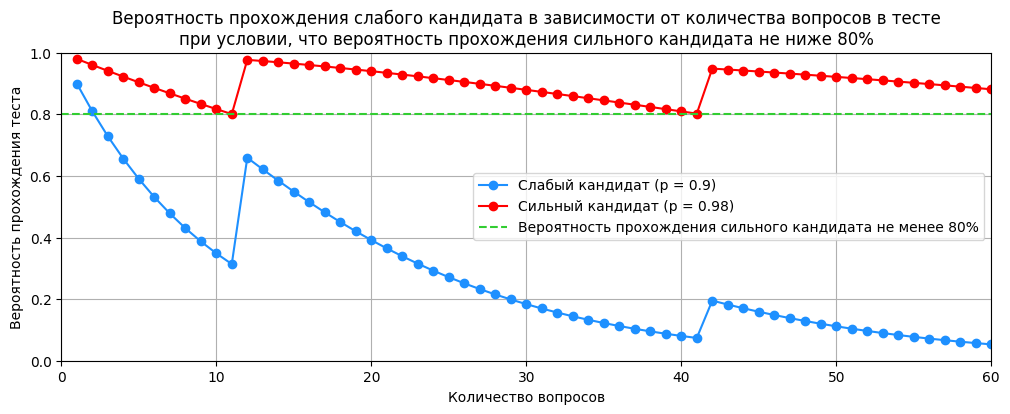

In [9]:
# строим график
plt.figure(figsize=(12, 4))
plt.plot(df_opt['n_len'], df_opt['weak_pass_prob'], color='dodgerblue', marker='o',  label='Слабый кандидат (p = 0.9)')
plt.plot(df_opt['n_len'], df_opt['strong_pass_prob'],  color='r', marker='o', label='Сильный кандидат (p = 0.98)')
plt.title('''Вероятность прохождения слабого кандидата в зависимости от количества вопросов в тесте
при условии, что вероятность прохождения сильного кандидата не ниже 80%''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.8, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')
# plt.axvline(x=11, color='#2F4F4F', linestyle='--', label = 'Самая приближенная вероятность прохода сильным кандидатом, \nдо первого скачка' )

plt.grid(True)
plt.xlim([0,60])
plt.ylim([0,1])
plt.legend()
plt.show()

<ipython-input-10-0d3fd8b93445>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([24, 24], [0.29, 0], 'k--', color = 'dodgerblue')


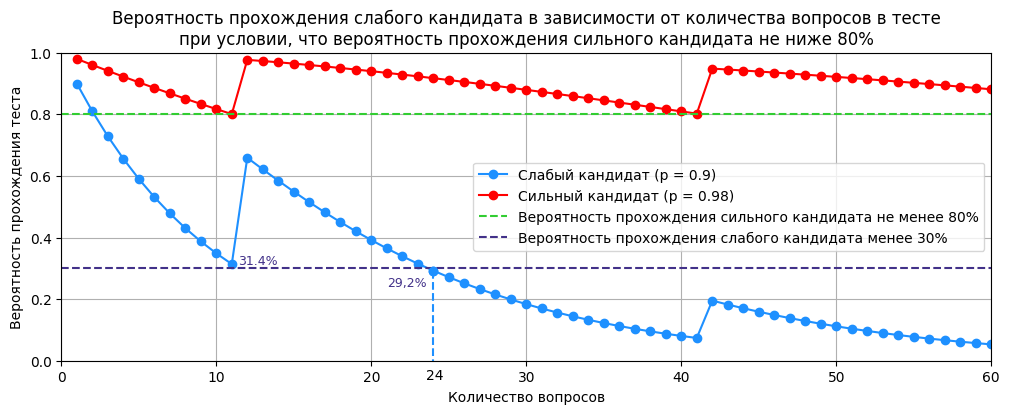

In [10]:
# строим график
plt.figure(figsize=(12, 4))
plt.plot(df_opt['n_len'], df_opt['weak_pass_prob'], color='dodgerblue', marker='o',  label='Слабый кандидат (p = 0.9)')
plt.plot(df_opt['n_len'], df_opt['strong_pass_prob'],  color='r', marker='o', label='Сильный кандидат (p = 0.98)')
plt.title('''Вероятность прохождения слабого кандидата в зависимости от количества вопросов в тесте
при условии, что вероятность прохождения сильного кандидата не ниже 80%''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.8, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')

plt.axhline(y=0.3, color='#423189', linestyle='--', label='Вероятность прохождения слабого кандидата менее 30%')
# plt.axvline(x=11, color='#2F4F4F', linestyle='--', label = 'Самая приближенная вероятность прохода сильным кандидатом, \nдо первого скачка' )
plt.text(11.4, 0.313, '31.4%', fontsize=9, color='#423189')
plt.text(21, 0.24, '29,2%', fontsize=9, color='#423189')

plt.plot(24, 0.292, 'o', markersize=6, color = 'dodgerblue')
plt.plot([24, 24], [0.29, 0], 'k--', color = 'dodgerblue')
plt.text(23.5, -0.06 , '24', fontsize=10)

plt.grid(True)
plt.xlim([0,60])
plt.ylim([0,1])
plt.legend()
plt.show()

#Черный уровень

###**Сложность 1: «проще, чем в работе»**

In [11]:
data = []

p_strong = 0.99
p_weak = 0.95

for n in range(1, 61):
    k = sps.binom.ppf(0.2, n, p_strong)
    prob_strong = 1 - sps.binom.cdf(k - 1, n, p_strong)
    prob_weak = 1 - sps.binom.cdf(k - 1, n, p_weak)
    data.append({'n_len': n, 'porog': int(k), 'strong_pass_prob': prob_strong, 'weak_pass_prob': prob_weak})

df_opt_1 = pd.DataFrame(data)

df_opt_1.head(60).style.hide(axis="index").set_caption(df_title)

n_len,porog,strong_pass_prob,weak_pass_prob
1,1,0.990000,0.950000
2,2,0.980100,0.902500
3,3,0.970299,0.857375
4,4,0.960596,0.814506
5,5,0.950990,0.773781
6,6,0.941480,0.735092
7,7,0.932065,0.698337
8,8,0.922745,0.663420
9,9,0.913517,0.630249
10,10,0.904382,0.598737


In [12]:
df_opt_1.iloc[48].transpose()

,48
n_len,49.000000
porog,48.000000
strong_pass_prob,0.913589
weak_pass_prob,0.289876


<ipython-input-13-773b1d1d2ce6>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([49, 49], [0.29, 0], 'k--', color = 'dodgerblue')


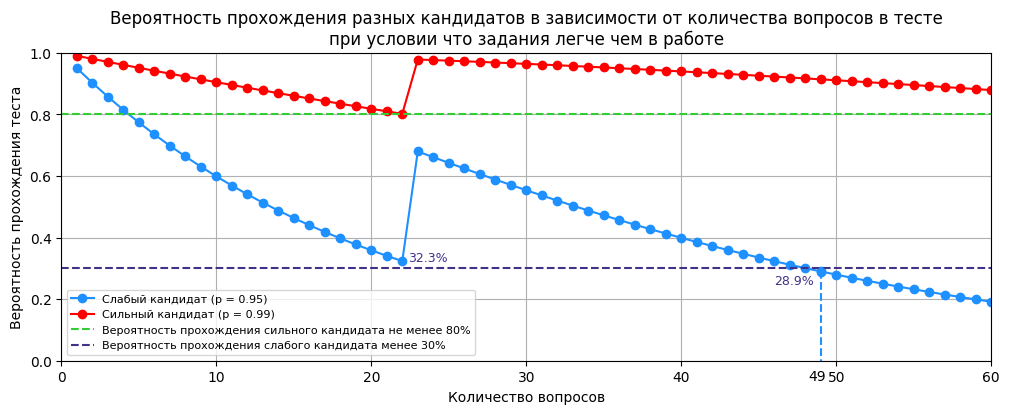

In [13]:
# строим график
plt.figure(figsize=(12, 4))
plt.plot(df_opt_1['n_len'], df_opt_1['weak_pass_prob'], color='dodgerblue', marker='o',  label='Слабый кандидат (p = 0.95)')
plt.plot(df_opt_1['n_len'], df_opt_1['strong_pass_prob'],  color='r', marker='o', label='Сильный кандидат (p = 0.99)')
plt.title('''Вероятность прохождения разных кандидатов в зависимости от количества вопросов в тесте
при условии что задания легче чем в работе''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.8, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')

plt.axhline(y=0.3, color='#423189', linestyle='--', label='Вероятность прохождения слабого кандидата менее 30%')

plt.text(22.4, 0.323, '32.3%', fontsize=9, color='#423189')



dot_x = 49
dot_y = 0.289

plt.text(dot_x - 3, dot_y - 0.04, f'{dot_y * 100}%', fontsize=9, color='#423189')
plt.plot(dot_x , dot_y, 'o', markersize=6, color = 'dodgerblue')

plt.plot([49, 49], [0.29, 0], 'k--', color = 'dodgerblue')
plt.text(48.2, -0.065 , '49', fontsize=10)

plt.grid(True)
plt.xlim([0,60])
plt.ylim([0,1])
plt.legend( fontsize = 8)
plt.show()

In [14]:
p_strong = 0.99
p_weak = 0.95
n = 49
porog = 48
print(f'шанс сдать больше чем на {porog} вопоросов: {1 - sps.binom.cdf(porog-1, n, p_strong)}','\n',
      f'шанс сдать больше чем на {porog} вопоросов: {1 - sps.binom.cdf(porog-1, n, p_weak)}')

шанс сдать больше чем на 48 вопоросов: 0.9135894085945864 
 шанс сдать больше чем на 48 вопоросов: 0.28987580713664807


Решил проверить, а то сомневаться начал)))

###Сложность сложнее чем в работе

In [15]:
data = []

p_strong = 0.7
p_weak = 0.2

for n in range(1, 61):
    k = sps.binom.ppf(0.2, n, p_strong)
    prob_strong = 1 - sps.binom.cdf(k - 1, n, p_strong)
    prob_weak = 1 - sps.binom.cdf(k - 1, n, p_weak)
    data.append({'n_len': n, 'porog': int(k), 'strong_pass_prob': prob_strong, 'weak_pass_prob': prob_weak})

df_opt_2 = pd.DataFrame(data)

df_opt_2.head(60).style.hide(axis="index").set_caption(df_title)

n_len,porog,strong_pass_prob,weak_pass_prob
1,0,1.000000,1.000000
2,1,0.910000,0.360000
3,1,0.973000,0.488000
4,2,0.916300,0.180800
5,3,0.836920,0.057920
6,3,0.929530,0.098880
7,4,0.873964,0.033344
8,5,0.805896,0.010406
9,5,0.901191,0.019581
10,6,0.849732,0.006369


<ipython-input-16-7c8f00b74ff3>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([dot_x, dot_x], [dot_y, 0], 'k--', color = 'dodgerblue')


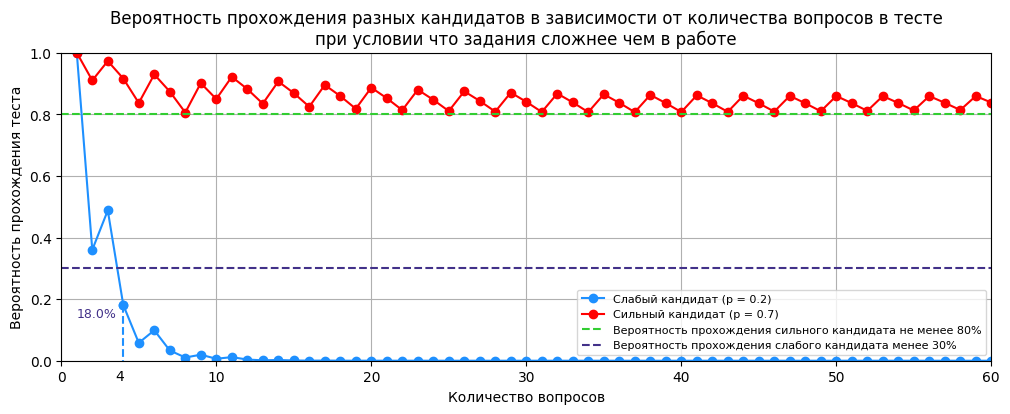

In [16]:
# строим график
plt.figure(figsize=(12, 4))
plt.plot(df_opt_2['n_len'], df_opt_2['weak_pass_prob'], color='dodgerblue', marker='o',  label=f'Слабый кандидат (p = {p_weak})')
plt.plot(df_opt_2['n_len'], df_opt_2['strong_pass_prob'],  color='r', marker='o', label=f'Сильный кандидат (p = {p_strong})')
plt.title('''Вероятность прохождения разных кандидатов в зависимости от количества вопросов в тесте
при условии что задания сложнее чем в работе''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.8, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')

plt.axhline(y=0.3, color='#423189', linestyle='--', label='Вероятность прохождения слабого кандидата менее 30%')

# plt.text(22.4, 0.323, '32.3%', fontsize=9, color='#423189')



dot_x = 4
dot_y = 0.18

plt.text(dot_x - 3, dot_y - 0.04, f'{dot_y * 100}%', fontsize=9, color='#423189')
plt.plot(dot_x , dot_y, 'o', markersize=6, color = 'dodgerblue')

plt.plot([dot_x, dot_x], [dot_y, 0], 'k--', color = 'dodgerblue')
plt.text(dot_x - 0.5, -0.065 , f'{dot_x}', fontsize=10)

plt.grid(True)
plt.xlim([0,60])
plt.ylim([0,1])
plt.legend( fontsize = 8)
plt.show()

#Черный Финальный график

In [17]:
import seaborn

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-19-0d3fd8b93445>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([24, 24], [0.29, 0], 'k--', color = 'dodgerblue')


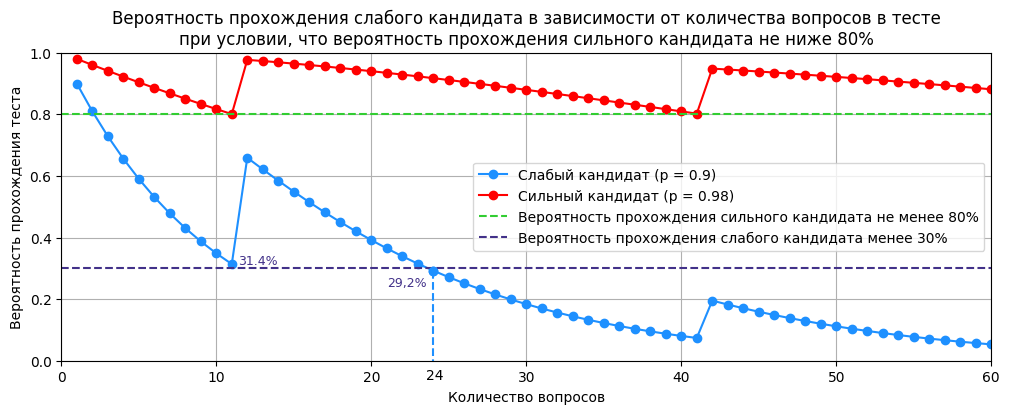

In [19]:
# строим график
plt.figure(figsize=(12, 4))
plt.plot(df_opt['n_len'], df_opt['weak_pass_prob'], color='dodgerblue', marker='o',  label='Слабый кандидат (p = 0.9)')
plt.plot(df_opt['n_len'], df_opt['strong_pass_prob'],  color='r', marker='o', label='Сильный кандидат (p = 0.98)')
plt.title('''Вероятность прохождения слабого кандидата в зависимости от количества вопросов в тесте
при условии, что вероятность прохождения сильного кандидата не ниже 80%''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.8, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')

plt.axhline(y=0.3, color='#423189', linestyle='--', label='Вероятность прохождения слабого кандидата менее 30%')
# plt.axvline(x=11, color='#2F4F4F', linestyle='--', label = 'Самая приближенная вероятность прохода сильным кандидатом, \nдо первого скачка' )
plt.text(11.4, 0.313, '31.4%', fontsize=9, color='#423189')
plt.text(21, 0.24, '29,2%', fontsize=9, color='#423189')

plt.plot(24, 0.292, 'o', markersize=6, color = 'dodgerblue')
plt.plot([24, 24], [0.29, 0], 'k--', color = 'dodgerblue')
plt.text(23.5, -0.06 , '24', fontsize=10)

plt.grid(True)
plt.xlim([0,60])
plt.ylim([0,1])
plt.legend()
plt.show()


<ipython-input-20-5ddbf2cc085a>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([49, 49], [0.29, 0], 'k--', color = 'dodgerblue')
<ipython-input-20-5ddbf2cc085a>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([24, 24], [0.29, 0], 'k--', color = 'dodgerblue')
<ipython-input-20-5ddbf2cc085a>:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([dot_x, dot_x], [dot_y, 0], 'k--', color = 'dodgerblue')


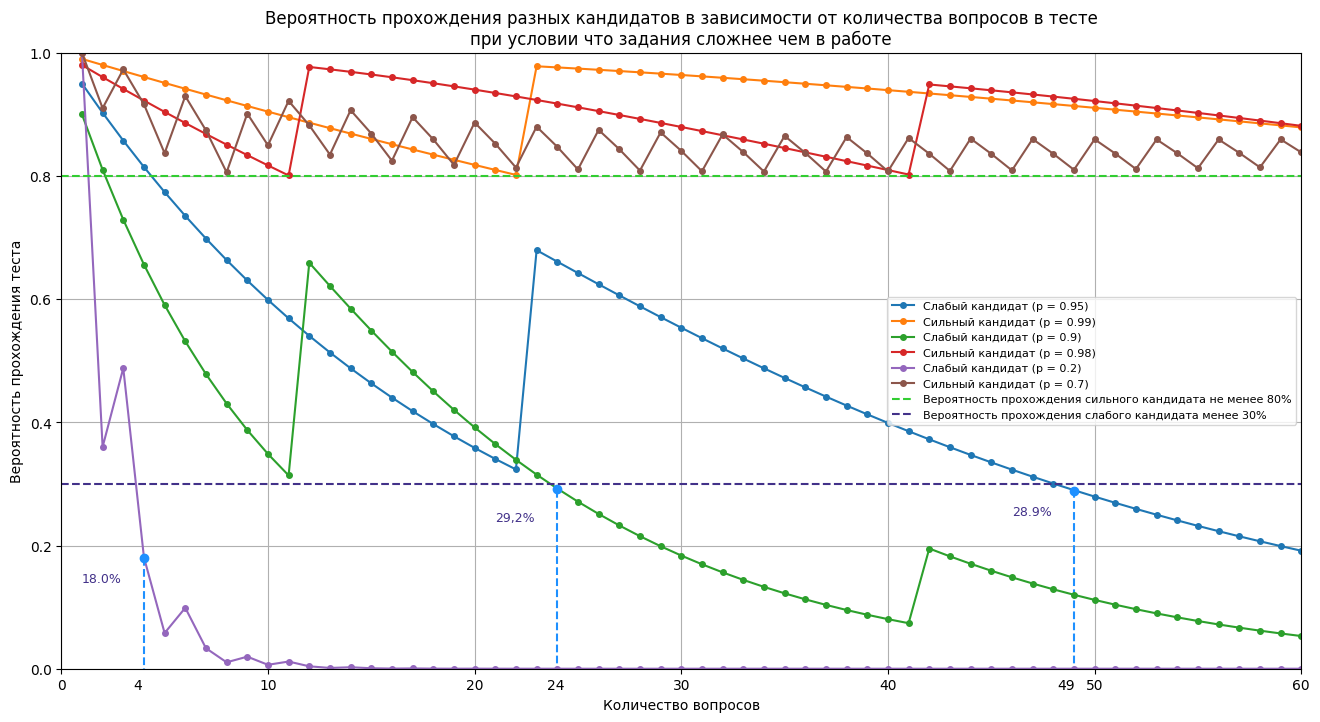

In [20]:
# -----------------------------------------------------------------------------------------------------------легкий график
plt.figure(figsize=(16, 8))


plt.plot(df_opt_1['n_len'], df_opt_1['weak_pass_prob'], marker='o', markersize=4, label='Слабый кандидат (p = 0.95)')
plt.plot(df_opt_1['n_len'], df_opt_1['strong_pass_prob'], marker='o', markersize=4, label='Сильный кандидат (p = 0.99)')
plt.title('''Вероятность прохождения разных кандидатов в зависимости от количества вопросов в тесте
при условии что задания легче чем в работе''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')


# plt.text(22.4, 0.323, '32.3%', fontsize=9, color='#423189')



dot_x = 49
dot_y = 0.289

plt.text(dot_x - 3, dot_y - 0.04, f'{dot_y * 100}%', fontsize=9, color='#423189')
plt.plot(dot_x , dot_y, 'o', markersize=6, color = 'dodgerblue')

plt.plot([49, 49], [0.29, 0], 'k--', color = 'dodgerblue')
plt.text(48.2, -0.034 , '49', fontsize=10)


# -----------------------------------------------------------------------------------------------------------график как в работе
plt.plot(df_opt['n_len'], df_opt['weak_pass_prob'], marker='o', markersize=4, label='Слабый кандидат (p = 0.9)')
plt.plot(df_opt['n_len'], df_opt['strong_pass_prob'], marker='o', markersize=4, label='Сильный кандидат (p = 0.98)')
plt.title('''Вероятность прохождения слабого кандидата в зависимости от количества вопросов в тесте
при условии, что вероятность прохождения сильного кандидата не ниже 80%''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')


# plt.axvline(x=11, color='#2F4F4F', linestyle='--', label = 'Самая приближенная вероятность прохода сильным кандидатом, \nдо первого скачка' )
# plt.text(11.4, 0.313, '31.4%', fontsize=9, color='#423189')
plt.text(21, 0.24, '29,2%', fontsize=9, color='#423189')

plt.plot(24, 0.292, 'o', markersize=6, color = 'dodgerblue')
plt.plot([24, 24], [0.29, 0], 'k--', color = 'dodgerblue')
plt.text(23.5, -0.034 , '24', fontsize=10)


# -----------------------------------------------------------------------------------------------------------сложный график
plt.plot(df_opt_2['n_len'], df_opt_2['weak_pass_prob'], marker='o', markersize=4, label=f'Слабый кандидат (p = {p_weak})')
plt.plot(df_opt_2['n_len'], df_opt_2['strong_pass_prob'], marker='o', markersize=4, label=f'Сильный кандидат (p = {p_strong})')
plt.title('''Вероятность прохождения разных кандидатов в зависимости от количества вопросов в тесте
при условии что задания сложнее чем в работе''')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность прохождения теста')

plt.axhline(y=0.8, color='limegreen', linestyle='--', label='Вероятность прохождения сильного кандидата не менее 80%')

plt.axhline(y=0.3, color='#423189', linestyle='--', label='Вероятность прохождения слабого кандидата менее 30%')




dot_x = 4
dot_y = 0.18

plt.text(dot_x - 3, dot_y - 0.04, f'{dot_y * 100}%', fontsize=9, color='#423189')
plt.plot(dot_x , dot_y, 'o', markersize=6, color = 'dodgerblue')

plt.plot([dot_x, dot_x], [dot_y, 0], 'k--', color = 'dodgerblue')
plt.text(dot_x - 0.5, -0.034 , f'{dot_x}', fontsize=10)



plt.grid(True)
plt.xlim([0,60])
plt.ylim([0,1])
plt.legend( fontsize = 8)
plt.show()